# Google Trends API for Python

Get trending results from google trends using the pytrends API.

[pytrends API](https://pypi.org/project/pytrends/)



---

In [ ]:
#@title Load Libraries
!pip install pytrends
import pytrends
import pandas as pd
from IPython.display import display, HTML
import ipywidgets as widgets
from pytrends.request import TrendReq
import time
%load_ext google.colab.data_table



  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=f5bdf85f16336cc9678b40e745200c862dfb40d91a5d0c3a3c746866f686c018
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [ ]:
button = widgets.Button(description="Search")
output = widgets.Output()

# @title Enter Search Terms
search_terms = "Kanye West, Pete Davidson, Pitbull, Julia Fox" #@param {type:"string"}
## Build your search in kw_list
search_terms = search_terms.split(',')
kw_list = []
for term in search_terms:
  s = term.strip(' ')
  kw_list.append(s)

## Include control term to scale results against
control = "Milk"  #@param {type:"string"}

time_frame = "today 5-y" #@param ['today 5-y', 'today 3-m', 'now 7-d'] {allow-input: true}
##  Build pytrends payload and query
trends = dict()
trends2 = dict()
related_queries = dict()

pytrends = TrendReq(hl='en-US', tz=360)


def on_button_clicked(b):
  max_count = len(kw_list)
  f = widgets.IntProgress(min=0, max=max_count, description='Progress:', orientation='horizontal')
  display(f)
  count = 0
  # while count <= max_count:
    # f.value = count # signal to increment the progress bar
    # time.sleep(.1)
    # count += 1
  for i in kw_list:
    f.value += 1
    #build out query an modify parameters below
    #choose a timeframe 'today 5-y', 'YYYY-MM-DD YYYY-MM-DD', 'today 3-m', 'now 7-d'
    pytrends.build_payload([i, control], cat = 0, timeframe = time_frame, geo = 'US')
    ##save trend to dictionary
    trends[i] = pytrends.interest_over_time()[i]
    trends2[i] = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=True)[i]
    related_queries[i] = pytrends.related_queries()[i]
  with output:
    print('\nSearch complete!')
## Run all cells to perform search

button.on_click(on_button_clicked)
display(button)
display(output)





Button(description='Search', style=ButtonStyle())

Output()

IntProgress(value=0, description='Progress:', max=4)

In [ ]:
df = pd.DataFrame(trends)
df.to_csv("interest_over_time.csv")
print("Interest Over Time")
## Display table with results
display(df.reset_index())


Interest Over Time


,date,Kanye West,Pete Davidson,Pitbull,Julia Fox
0,2017-02-26,7,0,10,0
1,2017-03-05,6,1,10,0
2,2017-03-12,7,1,11,0
3,2017-03-19,8,0,13,0
4,2017-03-26,7,0,11,0
...,...,...,...,...,...
256,2022-01-23,10,10,9,15
257,2022-01-30,10,8,9,8
258,2022-02-06,14,9,10,9
259,2022-02-13,56,32,9,18


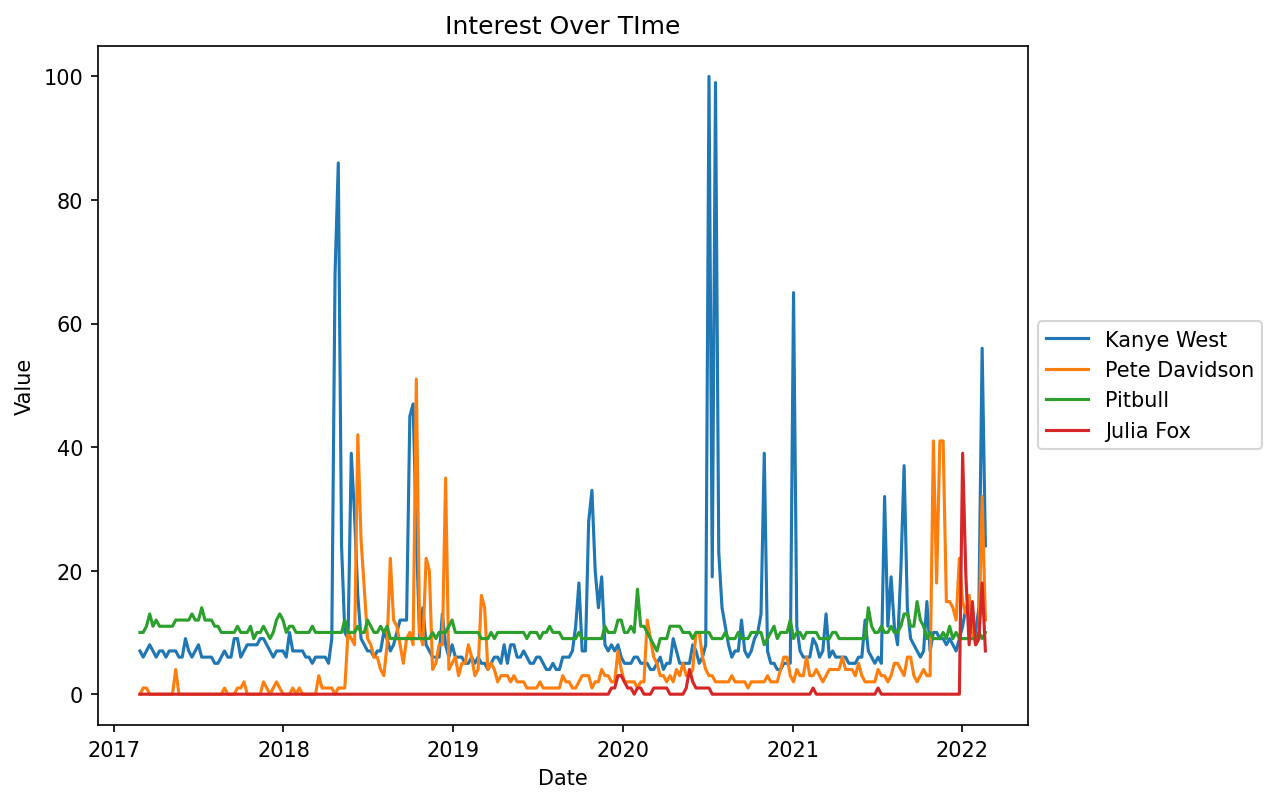

In [ ]:
## show results on a simple line chart
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=150)
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Interest Over TIme')
plt.legend(kw_list, loc='center left',  bbox_to_anchor=(1, .5))
plt.savefig('interest_over_time_fig.png', bbox_inches='tight', pad_inches=.1)
plt.show()


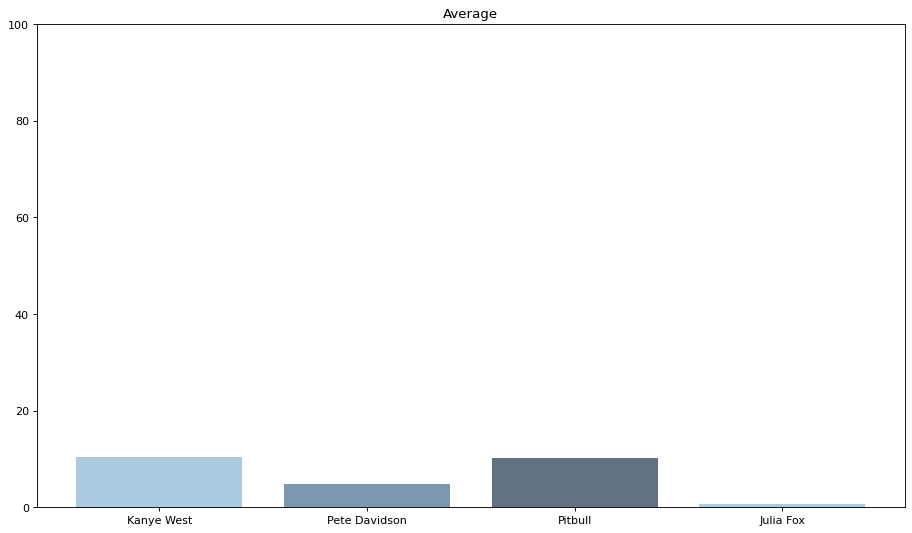

In [ ]:
## Show bar chart of averages
dict_mean = df.mean()
figure(figsize=(14, 8), dpi=80)
keys = range(len(df.mean()))
values = list(df.mean())
plt.title('Average')
plt.bar(keys, values, color=['#accbe1', '#7c98b3', '#637081'])
plt.xticks(range(len(df.mean())), list(dict_mean.keys()))
plt.ylim([0, 100])
plt.savefig('average_fig.png')
plt.show()




In [ ]:
## Show interest by region table

df = pd.DataFrame(trends2)
df.to_csv("interest_by_region.csv")

print("Interest by Region")
display(df)


Interest by Region


,Kanye West,Pete Davidson,Pitbull,Julia Fox
geoName,,,,
Alabama,12,4,16,0
Alaska,7,4,9,0
Arizona,14,7,17,0
Arkansas,10,3,15,0
California,14,7,12,1
Colorado,12,7,13,0
Connecticut,13,7,11,0
Delaware,11,5,12,0
District of Columbia,14,5,9,1


In [ ]:
## Show related queries table
d = related_queries
df = pd.DataFrame.from_dict(dict(d), orient='index')
df.to_csv("related_queries.csv")
left_df = df.style.set_properties(**{'text-align': 'left'})
# display(HTML(left_df.to_html()))
print("Related Queries")
display(left_df)


Related Queries


,top,rising
Kanye West,query value 0 kanye west worth 100 1 kardashian 97 2 kanye net worth 96 3 kanye west net worth 96 4 kim kardashian 86 5 kanye west kim kardashian 86 6 kanye west lyrics 72 7 kanye west song 51 8 kanye west album 48 9 twitter kanye west 43 10 kanye west president 39 11 kanye west trump 38 12 jay z 31 13 jay z kanye west 31 14 drake 30 15 kanye west drake 30 16 kanye west songs 28 17 kanye west 2020 27 18 kanye west donda 27 19 donda west 27 20 donda 27 21 kanye west and kim 26 22 kanye west jeffree star 24 23 jeffree star 24 24 kim kardashian net worth 22,query value 0 jesus is king kanye west 111300 1 jesus is king 109600 2 kanye west sunday service 67450 3 kanye west jeffree star 54250 4 jeffree star 54250 5 kanye west and jeffree star 45100 6 kanye west lift yourself 41300 7 lift yourself 41300 8 yandhi 39800 9 kanye west yandhi 39300 10 kanye west net worth 2021 36200 11 julia fox 32300 12 kanye west lil pump 29900 13 pete davidson 23050 14 kanye west net worth 2020 21600 15 kanye west net worth 2018 19250 16 kanye west net worth 2019 14850 17 kanye west votes 13600 18 candace owens 12900 19 closed on sunday kanye west 12800 20 kanye west poopity scoop 11350 21 kanye west wyoming 9750 22 kanye west wyoming ranch 8700 23 how many votes did kanye west get 8650 24 all mine kanye west 7850
Pete Davidson,query value 0 ariana pete davidson 100 1 ariana grande 90 2 ariana grande pete davidson 90 3 kim kardashian 36 4 pete davidson kim kardashian 36 5 pete davidson snl 31 6 snl 31 7 pete davidson and ariana 26 8 ariana grande and pete 23 9 ariana grande and pete davidson 23 10 kate beckinsale 22 11 pete davidson kate beckinsale 22 12 pete davidson net worth 22 13 pete davidson age 19 14 kim and pete davidson 18 15 pete davidson movie 15 16 pete davidson dating 14 17 mac miller 13 18 pete davidson mac miller 13 19 pete davidson girlfriend 13 20 pete davidson dad 13 21 pete davidson instagram 12 22 kim kardashian and pete davidson 12 23 who is pete davidson 12 24 kanye 12,query value 0 king of staten island 147700 1 pete davidson king of staten island 146600 2 ariana grande mac miller 108550 3 pete davidson kaia gerber 101550 4 kaia gerber 101500 5 suicide squad 86400 6 pete davidson suicide squad 85500 7 pete davidson machine gun kelly 77250 8 machine gun kelly 76350 9 pete davidson ariana grande engaged 72050 10 ariana grande engaged 71650 11 pete davidson and kate beckinsale 63150 12 the king of staten island 60050 13 ariana grande pete davidson lyrics 59200 14 dan crenshaw 57850 15 pete davidson dan crenshaw 57600 16 ariana grande net worth 56650 17 ariana grande pete davidson song 54250 18 pete davidson ariana grande split 49600 19 pete davidson and kim k 49000 20 pete davidson and ariana 47300 21 ariana grande and pete davidson 42550 22 ariana grande boyfriend 41650 23 ariana grande and pete 41600 24 pete davidson kate beckinsale age 41400
Pitbull,query value 0 pitbull dog 100 1 pitbull mix 91 2 pitbull puppies 76 3 puppies 76 4 pitbull for sale 49 5 blue pitbull 46 6 terrier 38 7 pitbull terrier 37 8 pitbull puppy 36 9 puppies for sale 33 10 pitbull puppies for sale 33 11 american pitbull 33 12 dogs 29 13 pitbull dogs 29 14 pitbull blue nose 25 15 bulldog 23 16 bully pitbull 21 17 red pitbull 20 18 black pitbull 19 19 pit bull 17 20 pitbulls 17 21 husky 16 22 pitbull husky 15 23 red nose pitbull 15 24 white pitbull 15,query value 0 pitbull shaver 30000 1 skull shaver pitbull 23150 2 pitbull rescue near me 1500 3 pitbull puppies for sale near me 1100 4 puppies for sale near me 1100 5 pitbull for sale near me 1000 6 pitbull puppies near me 900 7 micro pitbull 850 8 pitbull bite force 750 9 pitbull rescues near me 550 10 all black pitbull 500 11 golden doodle 500 12 grey pitbull puppy 350 13 merle pitbull 350 14 belgian malinois 300 15 pitbull mr worldwide 300 16 smiling pitbull 300 17 xl pitbull 300 18 patricio pitbull 300 19 cane corso pitbull mix 250 20 black pitbull puppy 250 21 great pyrenees 200 22 pi